In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from colorspacious import cspace_converter
plt.style.use('ggplot')

In [2]:

dataset = pd.read_csv('/home/portable014/Bureau/neelp_1/MAIN_4_PC/main4_capgemini/pre-traitement/données/stockage_csv/coords_4mots.csv')
#le path est à changer en fonction de l'endroit où on a mis le fichier csv
#ici, il prend un csv pré-enregistré avec 4 mots différents

dataset =dataset.fillna(0) #remplace les valeurs manquantes par 0

 

y = dataset[['class']] # vecteur colonne contenant la classe (= le nom du mot)
X = dataset.iloc[:, 1:6001] # matrice contenant toutes les coordonnées d'une vidéo 

#on split les données en données d'entrainements : X_train, y_train et en données de test : X_test et y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=27) #on séépare les données en 2 parties : 25% pour le test et 75% pour l'entrainement




In [3]:
## On va tester plusieurs modèles de classification
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [17]:
results = []
names = []
scoring = 'accuracy' #on choisit de tester les modèles en fonction de leur précision 
#on pourrait tester : precision, recall, f1-score, auc, log-loss, ...

for name, model in models:
    print('---------------------------------', name, '---------------------------------------------------')
    clf = model #on prend le modèle
    clf.fit(X_train, y_train)  #on entraine le modèle
    res = sklearn.metrics.accuracy_score(y_test, clf.predict(X_test)) #on teste le modèle
    results.append(res) #on stocke le résultat
    names.append(name) #on stocke le nom du modèle
    msg = "%s: %f (%f)" % (name, res.mean(), res.std()) #on affiche le résultat
    #print(msg)
print(results,names)

--------------------------------- LR ---------------------------------------------------


/home/portable014/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/portable014/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/portable014/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

--------------------------------- LDA ---------------------------------------------------
--------------------------------- KNN ---------------------------------------------------
--------------------------------- CART ---------------------------------------------------


/home/portable014/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/portable014/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------------------------------- NB ---------------------------------------------------
--------------------------------- SVM ---------------------------------------------------
[0.7058823529411765, 0.4264705882352941, 0.6764705882352942, 0.6029411764705882, 0.23529411764705882, 0.23529411764705882] ['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']


/home/portable014/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
for i in range(len(results)):
    print(names[i], results[i].mean())


LR 0.7058823529411765
LDA 0.4264705882352941
KNN 0.6764705882352942
CART 0.6029411764705882
NB 0.23529411764705882
SVM 0.23529411764705882


<BarContainer object of 6 artists>

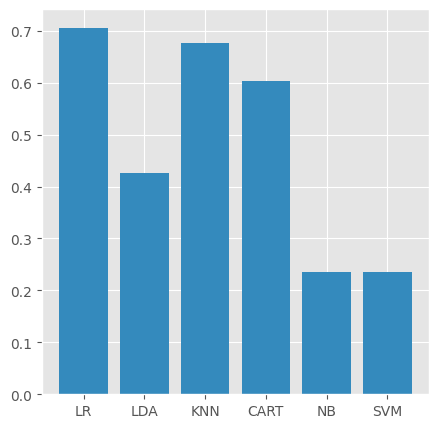

In [32]:
plt.figure(figsize=(5,5))

plt.subplot(111)
plt.bar(names, results,color='C1')
# plt.subplot(132)
# plt.scatter(names, results)
# plt.subplot(133)
# plt.plot(names, results)
# plt.suptitle('Categorical Plotting')
# plt.show()